Importing library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

make a dataframe

In [36]:
diabetes_df = pd.read_csv('diabetes_prediction_dataset.csv')

In [37]:
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


checking missing value

In [38]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


check duplicate values

In [39]:
print(diabetes_df.duplicated())
print(f'number of data duplicate = {diabetes_df.duplicated().sum()}')

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
number of data duplicate = 3854


In [40]:
diabetes_df.drop_duplicates(inplace=True)
diabetes_df.duplicated().sum()

0

checking anomali on dataframe

In [41]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [42]:
diabetes_df['age'].sort_values(ascending=True).unique()

array([ 0.08,  0.16,  0.24,  0.32,  0.4 ,  0.48,  0.56,  0.64,  0.72,
        0.8 ,  0.88,  1.  ,  1.08,  1.16,  1.24,  1.32,  1.4 ,  1.48,
        1.56,  1.64,  1.72,  1.8 ,  1.88,  2.  ,  3.  ,  4.  ,  5.  ,
        6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  ,
       15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 21.  , 22.  , 23.  ,
       24.  , 25.  , 26.  , 27.  , 28.  , 29.  , 30.  , 31.  , 32.  ,
       33.  , 34.  , 35.  , 36.  , 37.  , 38.  , 39.  , 40.  , 41.  ,
       42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  , 50.  ,
       51.  , 52.  , 53.  , 54.  , 55.  , 56.  , 57.  , 58.  , 59.  ,
       60.  , 61.  , 62.  , 63.  , 64.  , 65.  , 66.  , 67.  , 68.  ,
       69.  , 70.  , 71.  , 72.  , 73.  , 74.  , 75.  , 76.  , 77.  ,
       78.  , 79.  , 80.  ])

In [43]:
diabetes_df['age'] = diabetes_df['age'].astype('int')

cleaning data with float type


In [44]:
def clean_float(value) : 
    value = round(value, 2)
    return value


In [45]:
diabetes_df['HbA1c_level'] = diabetes_df['HbA1c_level'].apply(clean_float)
diabetes_df['HbA1c_level']

0        6.6
1        6.6
2        5.7
3        5.0
4        4.8
        ... 
99994    4.8
99996    6.5
99997    5.7
99998    4.0
99999    6.6
Name: HbA1c_level, Length: 96146, dtype: float64

In [46]:
diabetes_df['bmi'] = diabetes_df['bmi'].apply(clean_float)
diabetes_df['bmi']

0        25.19
1        27.32
2        27.32
3        23.45
4        20.14
         ...  
99994    24.60
99996    17.37
99997    27.83
99998    35.42
99999    22.43
Name: bmi, Length: 96146, dtype: float64

data visualization

In [47]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 7.0+ MB


In [48]:
diabetes_df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [49]:
gender_other = diabetes_df.loc[diabetes_df['gender'] == 'Other'].index
diabetes_df.drop(gender_other, inplace=True)

Visualization

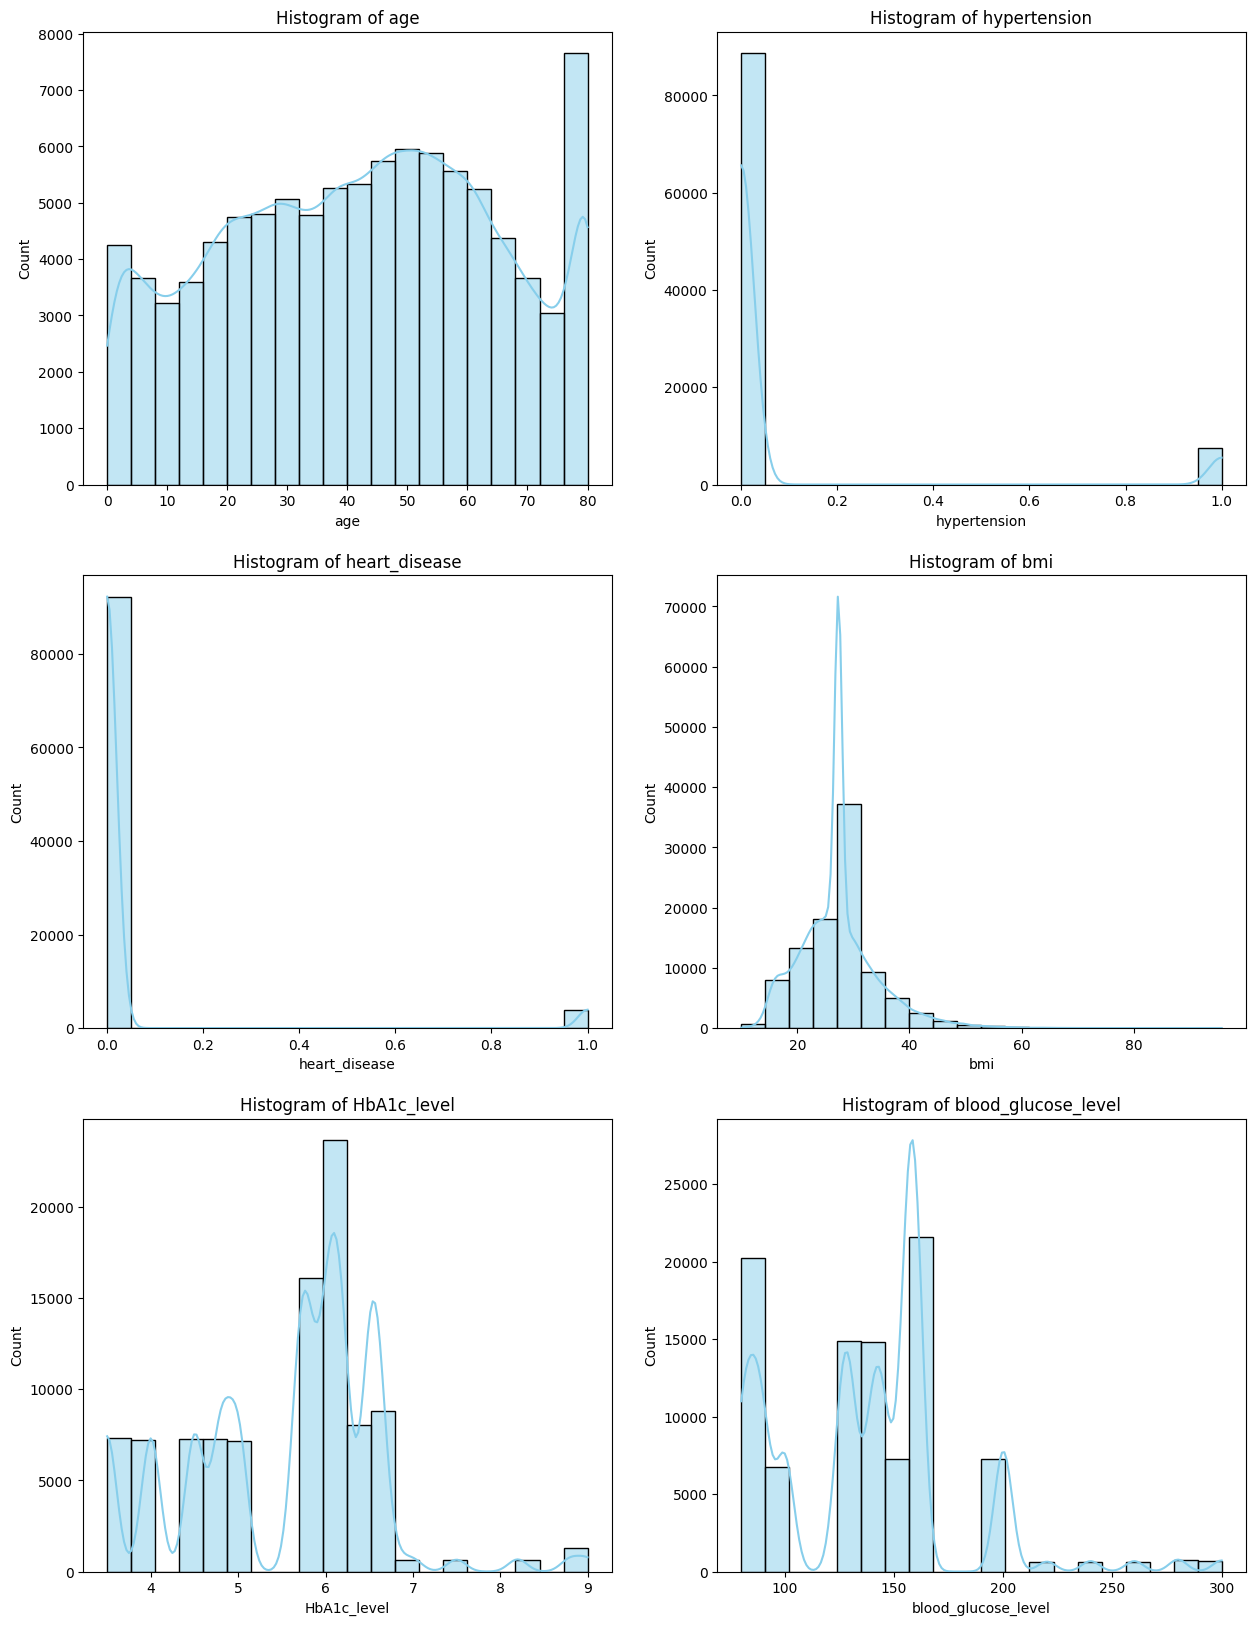

In [50]:
col_numeric = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15, 20))

for i, col in enumerate(col_numeric):
    sns.histplot(x=diabetes_df[col], kde=True, bins=20, color='skyblue', ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Histogram of {col}')

plt.show()


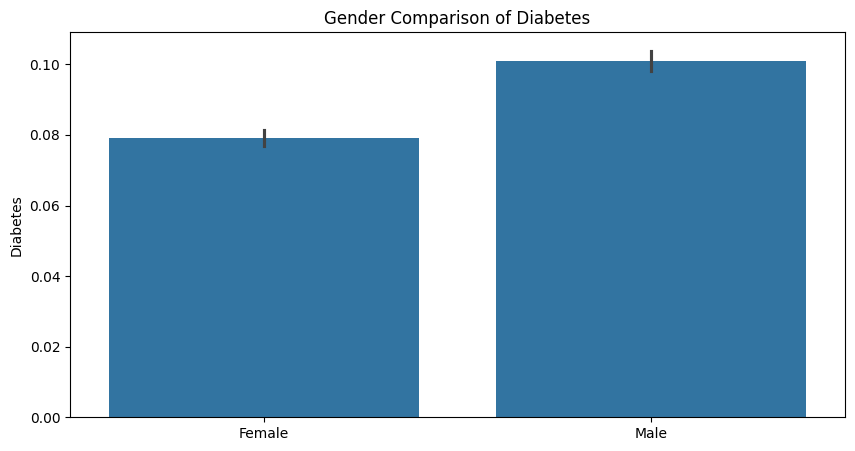

In [51]:
plt.figure(figsize=(10,5))

sns.barplot(
    y = 'diabetes',
    x = 'gender',
    data = diabetes_df
)
plt.title('Gender Comparison of Diabetes')
plt.ylabel('Diabetes')
plt.xlabel(None)
plt.show()

In [52]:
encoded_df = diabetes_df.copy()

for column in encoded_df.select_dtypes(include='object'):
  encoded_df[column] = LabelEncoder().fit_transform(encoded_df[column])

encoded_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


<Axes: >

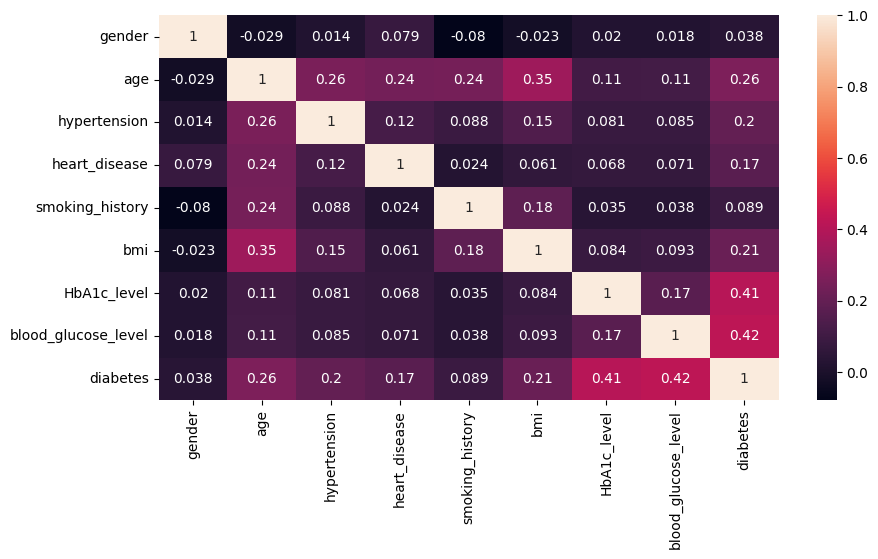

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(encoded_df.corr(), fmt='.2g', annot=True)

Modeling

In [54]:
encoded_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [55]:
from sklearn.model_selection import train_test_split

x = encoded_df.drop('diabetes', axis=1)
y = encoded_df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (76902, 8)
X_test : (19226, 8)
y_train : (76902,)
y_test : (19226,)


In [56]:
# Linear regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

# evaluate
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)

print(f'Linear Regression Mean Squared Error : {mse}')
print(f'Linear Regression Mean Absolute Error : {mae}')

Linear Regression Mean Squared Error : 0.052690267524715576
Linear Regression Mean Absolute Error : 0.1579084311211234


In [57]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

logistic_pred = logistic_model.predict(X_test)

# calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_pred)

# generate ROC curve
fpr, tpr, _= roc_curve(y_test, logistic_pred)
# evaluate
accuracy = accuracy_score(y_test, logistic_pred)
print(f'Logistic Regression Accuracy : {accuracy}')
print(f'Logistic Regression Classification Report :')
print(classification_report(y_test, logistic_pred))

Logistic Regression Accuracy : 0.9554769582856548
Logistic Regression Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17525
           1       0.84      0.61      0.71      1701

    accuracy                           0.96     19226
   macro avg       0.90      0.80      0.84     19226
weighted avg       0.95      0.96      0.95     19226



c:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=100, max_depth=10)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

Model Accuracy: 0.9693644023717882
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17525
           1       1.00      0.65      0.79      1701

    accuracy                           0.97     19226
   macro avg       0.98      0.83      0.89     19226
weighted avg       0.97      0.97      0.97     19226



prediksi

In [59]:
encoded_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


In [60]:
random_sample = encoded_df.sample(n=5, random_state=1)

X_sample = random_sample.drop('diabetes', axis=1)
y_sample = random_sample['diabetes']

model = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=100, max_depth=10)

model.fit(X_train,y_train)

y_pred_sample = model.predict(X_sample)

prediction = pd.DataFrame({"Actual": y_sample, "Predicted": y_pred_sample})
prediction

,Actual,Predicted
71645,0,0
86909,0,0
43323,0,0
42497,0,0
6794,0,0


In [61]:
columns = encoded_df.columns.unique()

for i in columns:
    print(i)
    print(encoded_df[i].unique())

gender
[0 1]
age
[80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25  0 33 16 61 31  8 49 39 65 14 70 48
 51 71 64 63 52 10 35 23  1]
hypertension
[0 1]
heart_disease
[1 0]
smoking_history
[4 0 1 3 2 5]
bmi
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes
[0 1]


In [62]:
columns = diabetes_df.columns.unique()

for i in columns:
    print(i)
    print(diabetes_df[i].unique())

gender
['Female' 'Male']
age
[80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25  0 33 16 61 31  8 49 39 65 14 70 48
 51 71 64 63 52 10 35 23  1]
hypertension
[0 1]
heart_disease
[1 0]
smoking_history
['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes
[0 1]


In [75]:
columns = encoded_df.columns.unique()

for i in columns:
    print(i)
    print(encoded_df[i].unique())

gender
[0 1]
age
[80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25  0 33 16 61 31  8 49 39 65 14 70 48
 51 71 64 63 52 10 35 23  1]
hypertension
[0 1]
heart_disease
[1 0]
smoking_history
[4 0 1 3 2 5]
bmi
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes
[0 1]


In [63]:
input_data_model = pd.DataFrame(
    [[1,22,1,0,4,22.5,6.5,100]],
    columns=['gender','age','hypertension','heart_disease','smoking_history','bmi','HbA1c_level','blood_glucose_level'])

In [64]:
model.predict(input_data_model)

array([0], dtype=int64)

In [66]:
import pickle as pk
pk.dump(model, open('model.pkl', 'wb'))

In [67]:
diabetes_df.to_csv('diabetes_df.csv')

In [74]:
diabetes_df['blood_glucose_level'].min()

80